In [1]:
!pip install rembg
!apt-get install -y libsm6 libxext6 libxrender-dev libgl1-mesa-glx libglib2.0-0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1build2).
libxext6 is already the newest version (2:1.3.4-1build1).
libxrender-dev is already the newest version (1:0.9.10-1build4).
libxrender-dev set to manually installed.
libglib2.0-0 is already the newest version (2.72.4-0ubuntu2.3).
libglib2.0-0 set to manually installed.
The following NEW packages will be installed:
  libgl1-mesa-glx
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,584 B of archives.
After this operation, 74.8 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 62.9GB/s]


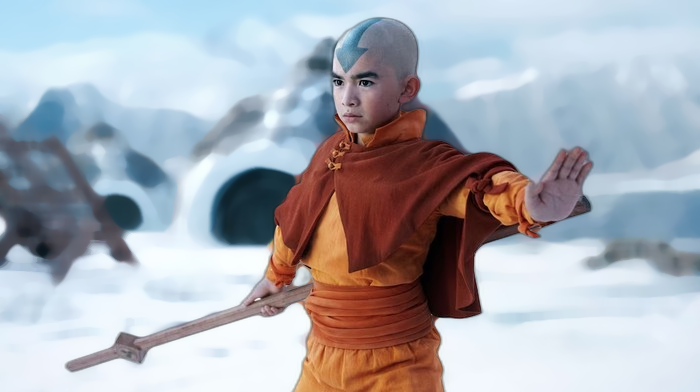

True

In [2]:
from rembg import remove
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Baca citra asli
image = cv2.imread('/content/WhatsApp Image 2024-03-15 at 13.18.45_1bf0f47c.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hapus latar belakang dari citra
output_image = remove(image)

# Terapkan median blur pada citra asli
median_filtered = cv2.medianBlur(image, 15)

# Simpan hasil blur dan citra dengan latar belakang dihapus untuk debug
cv2.imwrite('background_blur.png', median_filtered)
cv2.imwrite('output_colab.png', output_image)

# Konversi citra hasil remove ke format RGBA untuk transparansi
output_image_pil = Image.open('output_colab.png').convert('RGBA')

# Konversi citra hasil remove dan median blur ke format yang sesuai
output_image_rgba = np.array(output_image_pil)
median_filtered_rgb = cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB)

# Dapatkan dimensi citra
h1, w1 = median_filtered_rgb.shape[:2]
h2, w2 = output_image_rgba.shape[:2]

# Tentukan ukuran kanvas yang akan digunakan untuk padding
h = max(h1, h2)
w = max(w1, w2)

# Buat kanvas transparan untuk citra dengan latar belakang dihapus
canvas = np.zeros((h, w, 4), dtype=np.uint8)

# Tempatkan citra dengan latar belakang dihapus pada kanvas (di tengah)
y_offset = (h - h2) // 2
x_offset = (w - w2) // 2
canvas[y_offset:y_offset+h2, x_offset:x_offset+w2] = output_image_rgba

# Gabungkan citra yang sudah dihapus latar belakangnya dengan citra blur menggunakan alpha blending
alpha_mask = canvas[:, :, 3] / 255.0
alpha_inv = 1.0 - alpha_mask

for c in range(0, 3):
    median_filtered_rgb[:, :, c] = (alpha_mask * canvas[:, :, c] +
                                    alpha_inv * median_filtered_rgb[:, :, c])

# Konversi hasil akhir kembali ke format BGR untuk menyimpan menggunakan OpenCV
final_result_bgr = cv2.cvtColor(median_filtered_rgb, cv2.COLOR_RGB2BGR)

# Tampilkan hasil
cv2_imshow(final_result_bgr)

# Simpan hasil gabungan akhir
cv2.imwrite('final_result.png', final_result_bgr)